<a href="https://colab.research.google.com/github/abubakarsaidu/learn-github/blob/main/task/As_Abba_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q pyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
import numpy as np
from numpy import array
from numpy import hstack
import pandas as pd
import sys
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import time

In [ ]:
!pip install tensorflow

In [ ]:
!pip install -q keras

In [ ]:
# input features
downloaded = drive.CreateFile({'id':'1E22m1sSfQgqo_oDx5DlCjZ4oiG4bYmt2'})
downloaded.GetContentFile('Abba_Project.csv')

import pandas as pd
DATA = pd.read_csv('Abba_Project.csv')

DATA.shape
print(DATA)

              DateTime           ID  Junction  Vehicles  Number of Lanes  \
0       11/1/2015 0:00  20151101001         1       1.5                2   
1       11/1/2015 1:00  20151101011         1       1.3                2   
2       11/1/2015 2:00  20151101021         1       1.0                2   
3       11/1/2015 3:00  20151101031         1       0.7                2   
4       11/1/2015 4:00  20151101041         1       0.9                2   
...                ...          ...       ...       ...              ...   
48115  6/30/2017 19:00  20170630194         4       1.1                2   
48116  6/30/2017 20:00  20170630204         4       3.0                2   
48117  6/30/2017 21:00  20170630214         4       1.6                2   
48118  6/30/2017 22:00  20170630224         4       2.2                2   
48119  6/30/2017 23:00  20170630234         4       1.2                2   

       Status of driver  Nature of environment  Velocity of vehicle  \
0               

In [ ]:
x = np.array(DATA.iloc[:, 2:10].values, "float32")
y = np.array(DATA.iloc[:, 10:11].values, "float32")

print(x.shape, y.shape)

print(x)
print(y)

(48120, 8) (48120, 1)
[[1.   1.5  2.   ... 0.35 0.   0.  ]
 [1.   1.3  2.   ... 0.35 0.   1.  ]
 [1.   1.   2.   ... 0.35 0.   1.  ]
 ...
 [4.   1.6  2.   ... 0.35 1.   0.  ]
 [4.   2.2  2.   ... 0.35 1.   0.  ]
 [4.   1.2  2.   ... 0.35 1.   0.  ]]
[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
 # split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
in_seq1 = DATA.iloc[:, 2:6].values
in_seq2 = DATA.iloc[:, 6:10].values
out_seq = DATA.iloc[:, 10:11].values

print(in_seq1.shape, in_seq2.shape, out_seq.shape)

print(in_seq1)
print(in_seq2)
print(out_seq)

(48120, 4) (48120, 4) (48120, 1)
[[1.  1.5 2.  1. ]
 [1.  1.3 2.  1. ]
 [1.  1.  2.  1. ]
 ...
 [4.  1.6 2.  2. ]
 [4.  2.2 2.  2. ]
 [4.  1.2 2.  2. ]]
[[1.   0.35 0.   0.  ]
 [1.   0.35 0.   1.  ]
 [1.   0.35 0.   1.  ]
 ...
 [1.   0.35 1.   0.  ]
 [1.   0.35 1.   0.  ]
 [1.   0.35 1.   0.  ]]
[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 6

# convert into input/output
X, y = split_sequences(dataset, n_steps)

print(X.shape, y.shape)

#summarize the data
#for i in range(len(X)):
#  print(X[i], y[i])

#Split dataset inot training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(X_train.shape)

print(X_train)
print(y_train.shape)
print(y_train)
print(X_test.shape)
print(X_test)
print(y_test.shape)
print(y_test)

# the dataset knows the number of features, e.g. 2
#n_features = 25
n_features = 8

(48115, 6, 8) (48115,)
(33680, 6, 8)
[[[3.   7.   1.   ... 0.35 0.   0.  ]
  [3.   4.1  2.   ... 0.35 0.   0.  ]
  [3.   3.7  1.   ... 0.35 0.   0.  ]
  [3.   3.1  2.   ... 0.65 0.   0.  ]
  [3.   2.9  2.   ... 0.35 0.   0.  ]
  [3.   1.9  1.   ... 0.35 0.   0.  ]]

 [[3.   3.   1.   ... 0.35 0.   0.  ]
  [3.   3.5  1.   ... 0.35 0.   0.  ]
  [3.   3.   2.   ... 0.35 0.   0.  ]
  [3.   2.4  2.   ... 0.35 0.   0.  ]
  [3.   2.1  2.   ... 0.35 0.   0.  ]
  [3.   1.3  2.   ... 1.   0.   0.  ]]

 [[3.   1.1  1.   ... 0.35 0.   0.  ]
  [3.   1.   2.   ... 0.35 1.   0.  ]
  [3.   0.6  2.   ... 0.65 0.   0.  ]
  [3.   0.9  1.   ... 0.35 0.   0.  ]
  [3.   1.1  2.   ... 0.65 0.   0.  ]
  [3.   1.1  2.   ... 0.35 0.   0.  ]]

 ...

 [[3.   1.2  1.   ... 0.35 0.   0.  ]
  [3.   1.1  1.   ... 0.35 0.   0.  ]
  [3.   0.9  1.   ... 0.35 1.   1.  ]
  [3.   1.   2.   ... 0.65 0.   0.  ]
  [3.   0.9  2.   ... 0.35 0.   0.  ]
  [3.   1.3  1.   ... 0.35 0.   0.  ]]

 [[3.   0.9  1.   ... 0.35 0.   0.  ]

In [ ]:
# define model
model = Sequential()
model.add(SimpleRNN(8, return_sequences = True, activation='relu', input_shape=(n_steps, n_features)))
model.add(SimpleRNN(100, return_sequences = True))
model.add(SimpleRNN(100, return_sequences = True))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# define model
#model = Sequential()
#model.add(LSTM(8, return_sequences = True, activation='relu', input_shape=(n_steps, n_features)))
#model.add(LSTM(100, return_sequences = True))
#model.add(LSTM(100, return_sequences = True))
#model.add(LSTM(100))
#model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#model = Sequential()
#model.add(Dense(8, activation='relu', input_shape=(n_steps, n_features)))
#model.add(Dense(units = 100, activation = 'relu'))
#model.add(Dense(units = 100, activation = 'relu'))
#model.add(Dense(units = 100))
#model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 8)              136       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 100)            10900     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 100)            20100     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 51337 (200.54 KB)
Trainable params: 51337 (200.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fitting the RNN to the training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
337/337 [==============================] - 8s 13ms/step - loss: 0.0919 - accuracy: 0.8690
Epoch 2/100
337/337 [==============================] - 5s 14ms/step - loss: 0.0054 - accuracy: 0.9944
Epoch 3/100
337/337 [==============================] - 4s 13ms/step - loss: 0.0016 - accuracy: 0.9983
Epoch 4/100
337/337 [==============================] - 5s 16ms/step - loss: 0.0031 - accuracy: 0.9959
Epoch 5/100
337/337 [==============================] - 4s 13ms/step - loss: 8.0549e-04 - accuracy: 0.9991
Epoch 6/100
337/337 [==============================] - 4s 13ms/step - loss: 1.9488e-04 - accuracy: 0.9999
Epoch 7/100
337/337 [==============================] - 5s 15ms/step - loss: 0.0016 - accuracy: 0.9982
Epoch 8/100
337/337 [==============================] - 4s 12ms/step - loss: 0.0027 - accuracy: 0.9964
Epoch 9/100
337/337 [==============================] - 4s 12ms/step - loss: 3.0400e-04 - accuracy: 0.9997
Epoch 10/100
337/337 [==============================] - 5s 15ms/step -

In [ ]:
prediction = model.predict(X_test)
print(prediction)
y_pred = [1 if y>=0.5 else 0 for y in prediction]

452/452 [==============================] - 1s 3ms/step
[[4.5354379e-04]
 [9.9990559e-01]
 [9.9989372e-01]
 ...
 [9.9990791e-01]
 [9.9982584e-01]
 [9.9980122e-01]]


In [ ]:
print(y_test)
print(y_test.shape)

[0. 1. 1. ... 1. 1. 1.]
(14435,)


In [ ]:
print(y_pred)

[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 

In [ ]:
print(y_pred.shape)

AttributeError: 'list' object has no attribute 'shape'

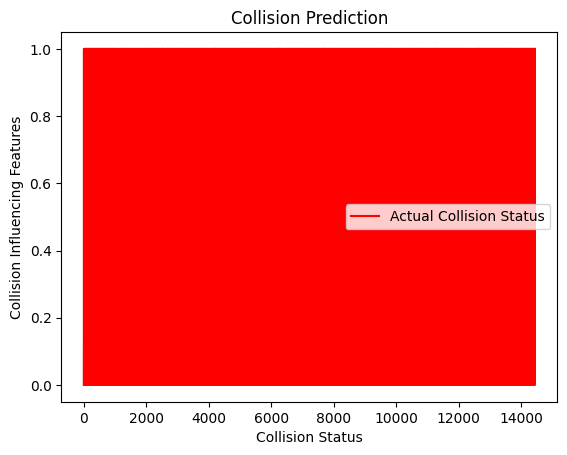

In [ ]:
#Visualizing the result
plt.plot(y_test, color='red', label='Actual Collision Status')
#plt.plot(y_pred, color='blue', label='Predicted Collision Status')
plt.title('Collision Prediction')
plt.xlabel('Collision Status')
plt.ylabel('Collision Influencing Features')
plt.legend()
plt.show()

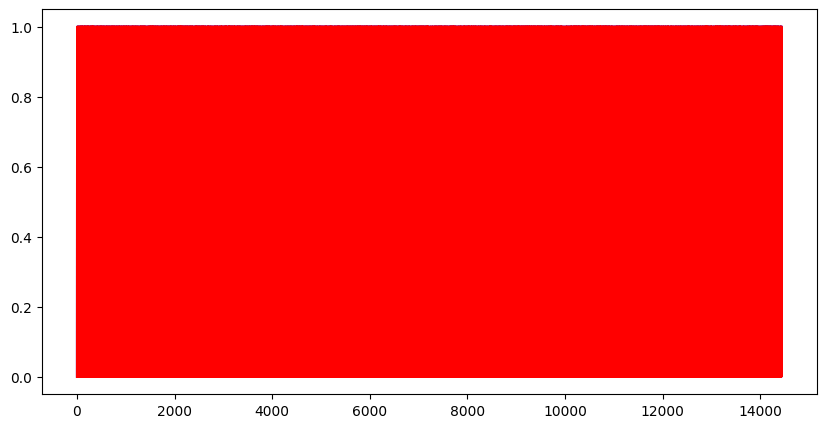

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(len(y_test)), y_test, '-b',label='Actual')
ax.plot(range(len(y_pred)), y_pred, 'r', label='Predicted')
plt.show()

In [ ]:
from math import sqrt
rmse = sqrt(1.3888e-05)
print(rmse)

0.003726660703632677
